<a href="https://colab.research.google.com/github/hy30n80/Data-Structure-/blob/main/%5BRECITATION_05%5D_Graph_(1~2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference


[geeksforgeeks](https://www.geeksforgeeks.org/graph-and-its-representations/)

[Stanford](https://web.stanford.edu/class/archive/cs/cs106x/cs106x.1192/lectures/Lecture22/Lecture22.pdf)

## Graph VS Tree

### Graph
* A graph is a collection of nodes (vertices) connected by edges.


### Tree
* A tree is a type of graph that is acyclic, meaning it does not contain any cycles or loops.


The relationship between graphs and trees is that ***a tree is a special type of graph***.

Specifically, a tree is an undirected graph without any cycles. In other words, every tree is a graph, but not every graph is a tree.

## Graph representation

### Adjacency List

In graph theory, an adjacency list is a way to represent a graph as a collection of lists. Each vertex in the graph is associated with a list that contains its neighboring vertices. This representation is efficient for sparse graphs where the number of edges is much smaller than the maximum number of possible edges.

In [1]:
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = [[] for _ in range(num_vertices)]

    def add_edge(self, source, destination):
        self.adj_list[source].append(destination)
        self.adj_list[destination].append(source)

    def print_graph(self):
        for vertex in range(self.num_vertices):
            print(f"Adjacent vertices of {vertex}: ", end="")
            for neighbor in self.adj_list[vertex]:
                print(neighbor, end=" ")
            print()

In [7]:
class Graph:
  def __init__(self, num_vertices):
    self.num_vertices = num_vertices
    self.adj_list = [[] for i in range(num_vertices)]

  def add_edge(self, source, destination):
    self.adj_list[source].append(destination)
    self.adj_list[destination].append(source)

  def print_graph(self):
      for vertex in range(self.num_vertices):
          print(f"Adjacent vertices of {vertex}: ", end="")
          for neighbor in self.adj_list[vertex]:
              print(neighbor, end=" ")
          print()

In [8]:
# Create a graph with 5 vertices
graph = Graph(5)

# Add edges to the graph
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

# Print the adjacency list representation of the graph
graph.print_graph()

Adjacent vertices of 0: 1 4 
Adjacent vertices of 1: 0 2 3 4 
Adjacent vertices of 2: 1 3 
Adjacent vertices of 3: 1 2 4 
Adjacent vertices of 4: 0 1 3 


### Disjoint Sets

A disjoint set data structure is used to partition a set into disjoint subsets. It supports two main operations: finding the representative (or parent) of a set and merging two sets together. Disjoint sets are often used in algorithms for solving problems related to connectivity and dynamic graphs.

In [13]:
class DisjointSet:
    def __init__(self, num_elements):
        self.num_elements = num_elements
        self.parent = [i for i in range(num_elements)] # 처음에는 자기 자신을 root node 로 갖고 있도록 함
        self.rank = [0] * num_elements

    def find(self, element):
        if self.parent[element] != element:
            self.parent[element] = self.find(self.parent[element])
        return self.parent[element]

    def union(self, element1, element2):
        root1 = self.find(element1)
        root2 = self.find(element2)

        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1

In [11]:
class DisjointSet:
  def __init__(self, num_elements):
    self.num_elements = num_elements
    self.parent = [i for i in range(num_elements)]
    self.rank = [0] * num_elements

  def find(self, element): #element 가 속한 subtree 의 root node 찾기
    if self.parent[element] == element:
      return self.parent[element]

    return self.find(self.parent[element])

  def union(self, element1, element2): #element1 과 element2 가 속한 subtree 를 하나로 합치기
    root1 = self.find(element1)
    root2 = self.find(element2)

    if self.rank[root1] > self.rank[root2]:
      self.parent[root2] = root1

    elif self.rank[root1] < self.rank[root2]:
      self.parent[root1] = root2

    elif self.rank[root1] == self.rank[root2]:
      self.parent[root2] = root1
      self.rank[root1] += 1


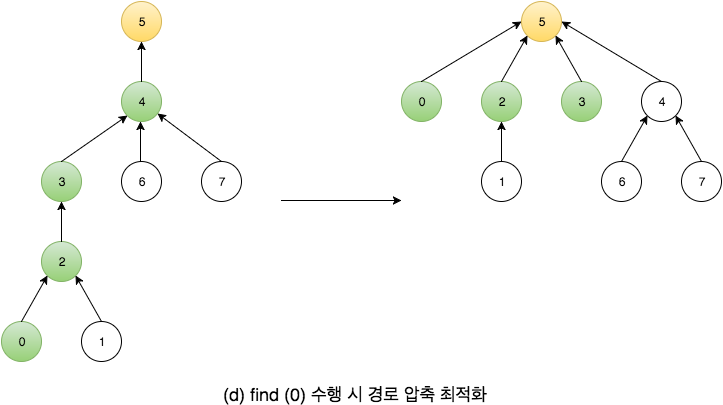

In [14]:
# Create a disjoint set with 5 elements
disjoint_set = DisjointSet(5)

# Perform union operations
disjoint_set.union(0, 2)
disjoint_set.union(4, 2)
disjoint_set.union(3, 1)

# Find the representative of each element
for i in range(5):
    print(f"Representative of element {i}: {disjoint_set.find(i)}")

Representative of element 0: 0
Representative of element 1: 3
Representative of element 2: 0
Representative of element 3: 3
Representative of element 4: 0


## BFS

BFS explores all the vertices of a graph in breadth-first order, starting from a given source vertex. It visits all the vertices at the same level before moving to the next level. It uses a queue data structure to keep track of the vertices to visit next.

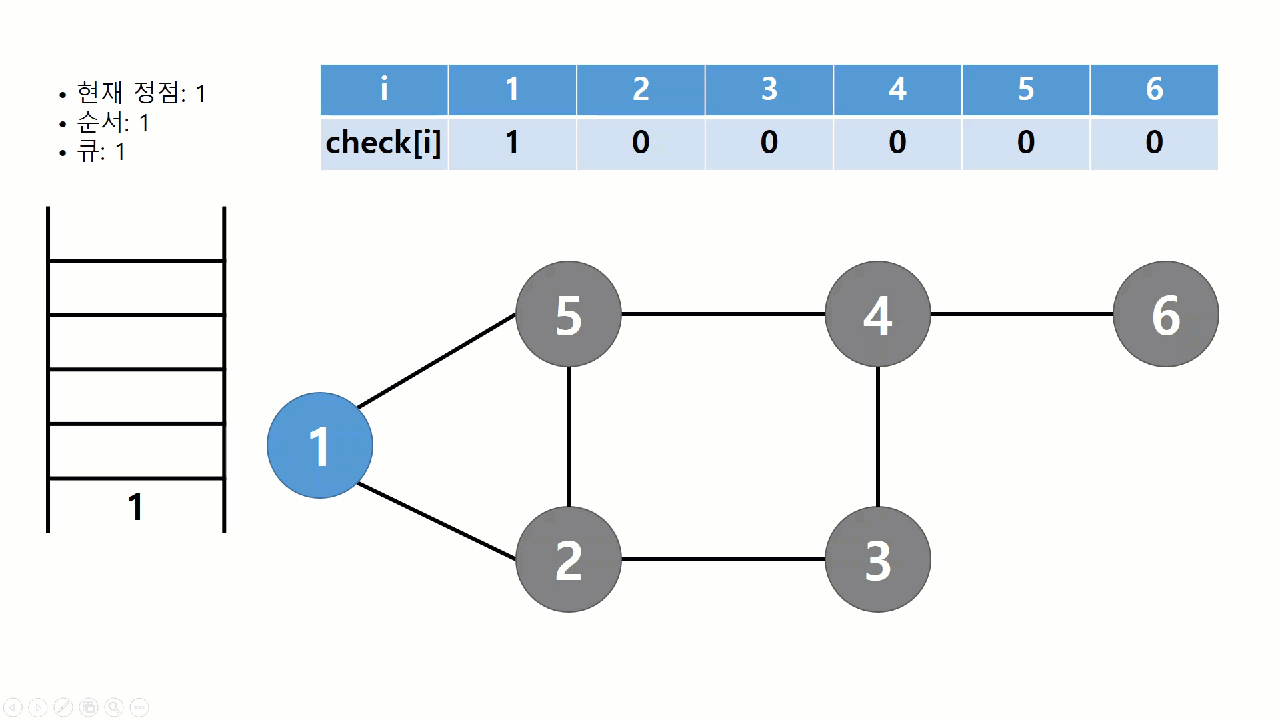

In [15]:
from collections import deque

In [45]:
# Example usage
graph = {
    '1': ['2', '5'],
    '2': ['1', '3', '5'],
    '3': ['2', '4'],
    '4': ['3', '5', '6'],
    '5': ['1', '2', '4'],
    '6': ['4']
}

In [46]:
# BFS implementation
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")  # Process the vertex
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

In [47]:
# set 은 add, queue 은 append
def bfs(graph, start):
  visited = set()
  queue = deque([start])

  while queue:
    vertex = queue.popleft()
    if vertex not in visited:
      print(vertex, end= " ")
      visited.add(vertex)

      for neighbor in graph[vertex]:
        if neighbor not in visited:
          queue.append(neighbor)



In [48]:
print("BFS traversal:")
bfs(graph, '1')

BFS traversal:
1 2 5 3 4 6 

## DFS

DFS explores all the vertices of a graph in depth-first order, starting from a given source vertex. It explores as far as possible along each branch before backtracking. It uses a stack (or recursion) to keep track of the vertices to visit next.

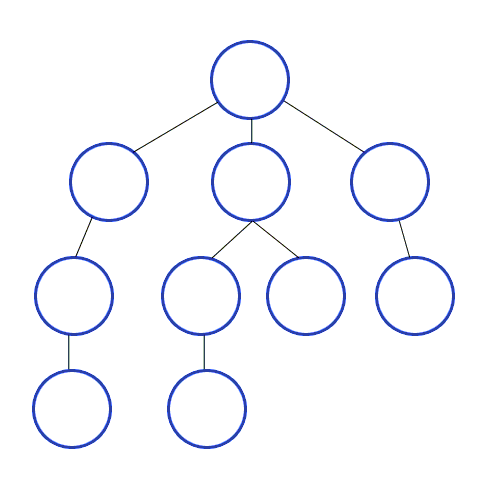

In [30]:
# Example usage
graph = {
    '1': ['2', '5', '9'],
    '2': ['1', '3'],
    '3': ['2', '4'],
    '4': ['3'],
    '5': ['1', '6', '8'],
    '6': ['5', '7'],
    '7': ['6'],
    '8': ['5'],
    '9': ['1', '10'],
    '10': ['9']
}

In [ ]:
# DFS recursive implementation
def dfs_left(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=" ")  # Process the vertex

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs_left(graph, neighbor, visited)

In [31]:
def dfs_left(graph, start, visited=None):
  if visited is None:
    visited = set()
  visited.add(start)
  print(start, end=" ")

  for neighbor in graph[start]:
    if neighbor not in visited:
      dfs_left(graph, neighbor, visited)

In [32]:
print("DFS traversal(recursion):")
dfs_left(graph, '1')

DFS traversal(recursion):
1 2 3 4 5 6 7 8 9 10 

In [37]:
# DFS stack implementation
def dfs_iterative_right(graph, start):
    visited = set()
    stack = [start]

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            print(vertex, end=" ")  # Process the vertex
            visited.add(vertex)

            # Push unvisited neighbors onto the stack
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    stack.append(neighbor)

In [41]:
def dfs_iterative_right(graph, start):
  visited = set()
  stack = []
  stack.append(start)

  while stack:
    vertex = stack.pop()
    if vertex not in visited:
      print(vertex, end=" ")
      visited.add(vertex)

      for neighbor in graph[vertex]:
        if neighbor not in visited:
          stack.append(neighbor)

In [42]:
print("DFS traversal(iterative):")
dfs_iterative_right(graph, '1')

DFS traversal(iterative):
1 9 10 5 8 6 7 2 3 4 

## MST(Minimum Spanning Trees)

Procedure
1. Ascending sort all edges by their weight
2. Add edges in that order into the MST; skip the edges that would produce cycles
3. Repeat the previous step until N-1 edges are added


In [49]:
# Graph representation using adjacency list
graph = {
    'vertices': ['0', '1', '2', '3', '4', '5', '6', '7', '8'],
    'edges': [
        (8, '0', '1'),
        (12, '0', '2'),
        (13, '1', '2'),
        (25, '1', '3'),
        (9, '1', '4'),
        (14, '2', '3'),
        (21, '2', '6'),
        (20, '3', '4'),
        (8, '3', '5'),
        (12, '3', '7'),
        (16, '3', '8'),
        (12, '3', '6'),
        (19, '4', '5'),
        (11, '5', '7'),
        (11, '6', '8'),
        (9, '7', '8'),
    ]
}

In [55]:
def kruskal(graph):
  mst = []
  sorted_edges = sorted(graph['edges'])
  disjoint_set = DisjointSet(len(graph['vertices']))

  for edge in sorted_edges:
    weight, u, v = edge

    root_v = disjoint_set.find(graph['vertices'].index(v))
    root_u = disjoint_set.find(graph['vertices'].index(u))

    if root_v != root_u:
      mst.append(edge)
      disjoint_set.union(root_v, root_u)

    if len(mst) == len(graph['vertices'])-1:
      break


  return mst

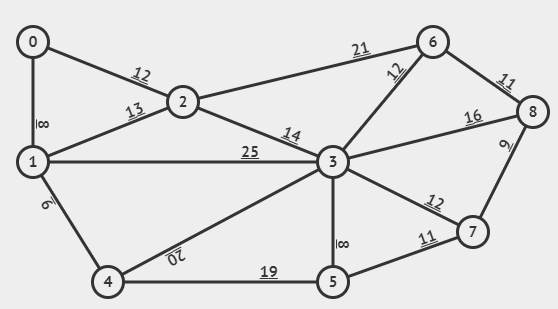

In [57]:
# Kruskal's algorithm
def kruskal(graph):
    # Sort edges by weight
    sorted_edges = sorted(graph['edges'])

    # Initialize disjoint set
    disjoint_set = DisjointSet(len(graph['vertices']))

    # Initialize MST
    mst = []

    # Iterate through sorted edges
    for edge in sorted_edges:
        weight, u, v = edge
        u_root = disjoint_set.find(graph['vertices'].index(u)) #해당 트리의 root 찾기
        v_root = disjoint_set.find(graph['vertices'].index(v)) #두개의 root 가 같다는 건, 같은 그래프에 있다는 말임 -> Cycle 발생시킨다는 말

        # Add edge to MST if it doesn't create a cycle
        if u_root != v_root:
            mst.append(edge)
            disjoint_set.union(u_root, v_root)

        # Stop if MST has V-1 edges
        if len(mst) == len(graph['vertices']) - 1:
            break

    return mst

In [58]:
# Test the algorithm
minimum_spanning_tree = kruskal(graph)
print(minimum_spanning_tree)

[(8, '0', '1'), (8, '3', '5'), (9, '1', '4'), (9, '7', '8'), (11, '5', '7'), (11, '6', '8'), (12, '0', '2'), (14, '2', '3')]
